In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. จงทดสอบที่ระดับนัยสำคัญ 0.05 ว่า ข้อมูลระบบเกียร์ (am) เป็นอิสระจากข้อมูลระบบเครื่องยนต์ (vs) หรือไม่

In [2]:
df = pd.read_csv("http://tinyurl.com/ProgStatMtcars")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**สมมติฐาน**:  
  

H0:  ข้อมูลระบบเกียร์ (am) และข้อมูลระบบเครื่องยนต์ (vs) ไม่ มีความสัมพันธ์กัน (เป็นอิสระต่อกัน)   
H1: ข้อมูลระบบเกียร์ (am) และข้อมูลระบบเครื่องยนต์ (vs) มีความสัมพันธ์กัน (ไม่เป็นอิสระต่อกัน)

**ค่า chi2_cal**:  
  

In [3]:
 O = pd.crosstab(df.am, df.vs)
 O

vs,0,1
am,,
0,12,7
1,6,7


In [4]:
chi2_cal, p_val, dof, E = stats.chi2_contingency(O, correction=False)
chi2_cal

0.9068825910931175

**ตาราง E**:  
  

In [5]:
E

array([[10.6875,  8.3125],
       [ 7.3125,  5.6875]])

**หาค่า chi2_crit:**   

In [6]:
chi2_crit = stats.chi2.isf(0.05, df=dof)
chi2_crit

3.8414588206941285

**หาค่า p-val:**   

In [7]:
p_val

0.34094291427437806

**สรุปผล:**   

- chi2_cal ตกในบริเวณยอมรับ H0  
- p_val > 0.05  

ดังนั้นยอมรับ H0 ข้อมูลระบบเกียร์ (am) และข้อมูลระบบเครื่องยนต์ (vs) ไม่ มีความสัมพันธ์กัน (เป็นอิสระต่อกัน) ที่ระดับนัยสำคัญ 0.05

**กราฟแจกแจงความน่าจะเป็น:**  
<font color='red'>***เนื่องจากข้อนี้มี df ต่ำ=1 กราฟจึงมีลักษณะดังภาพ แต่นิสิตสามารถวาดเป็นกราฟเบ้ขวาธรรมดาได้***</font>

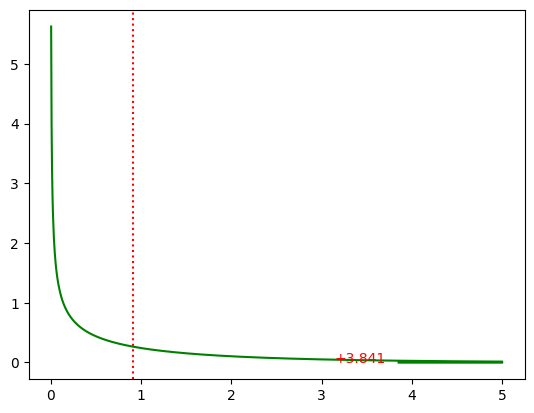

In [8]:
x = np.linspace(0,5,1000)
y = [stats.chi2.pdf(v, df=dof) for v in x]
chi2_critical_right = chi2_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=chi2_critical_right],
                 stats.chi2.pdf(x[x>=chi2_critical_right], df=dof),
                 color='g'
                 )
plt.text(chi2_critical_right-0.7, 0, f"+{chi2_critical_right:.3f}", color='r')
plt.axvline(chi2_cal, ls=':', color='r')

<font color='red'>***นิสิตสามารถวาดแบบนี้***</font>

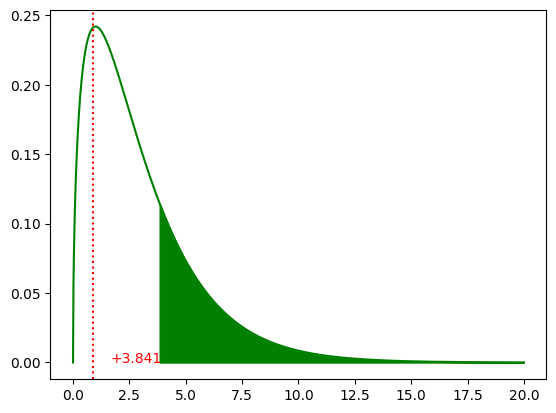

In [26]:
dof = 3
x = np.linspace(0,20,1000)
y = [stats.chi2.pdf(v, df=dof) for v in x]
chi2_critical_right = chi2_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=chi2_critical_right],
                 stats.chi2.pdf(x[x>=chi2_critical_right], df=dof),
                 color='g'
                 )
plt.text(chi2_critical_right-2.2, 0, f"+{chi2_critical_right:.3f}", color='r')
plt.axvline(chi2_cal, ls=':', color='r')

\
#### 2 จากชุดข้อมูล mtcars.csv  จงทดสอบว่าอัตราส่วนของรถที่มีจำนวนกระบอกสูบ 4, 6, และ 8  คือ 1:1:2 หรือไม่ที่ระดับนัยสำคัญ 0.1

**สมมติฐาน**:  
  

H0:  อัตราส่วนของรถที่มีจำนวนกระบอกสูบ 4, 6, และ 8  เท่ากับ 1:1:2   
H1: อัตราส่วนของรถที่มีจำนวนกระบอกสูบ 4, 6, และ 8  ไม่เท่ากับ 1:1:2

**ค่า chi2_cal**:  
  

In [10]:
df.cyl.value_counts().sort_index()

4    11
6     7
8    14
Name: cyl, dtype: int64

In [11]:
O = df.cyl.value_counts().sort_index()
#O = np.array([11,7,14])
p = np.array([1/4, 1/4, 2/4])
E = df.shape[0]*p
chi2_cal, p_val = stats.chisquare(f_obs=O,
                                 	 f_exp=E)
chi2_cal

1.5

**ตาราง E**:  
  

In [12]:
E

array([ 8.,  8., 16.])

**หาค่า chi2_crit:**   

In [13]:
chi2_crit = stats.chi2.isf(0.1, df = 3-1)
chi2_crit

4.605170185988092

**หาค่า p-val:**   

In [40]:
p_val

0.4723665527410149

**สรุปผล:**   

- chi2_cal ตกในบริเวณยอมรับ H0  
- p_val > 0.1  

ดังนั้นยอมรับ H0 อัตราส่วนของรถที่มีจำนวนกระบอกสูบ 4, 6, และ 8  เท่ากับ 1:1:2

**กราฟแจกแจงความน่าจะเป็น:**  

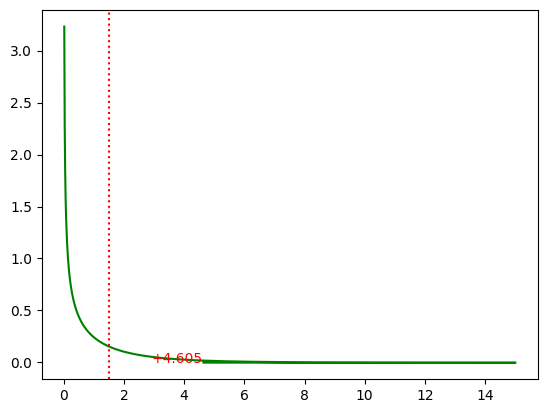

In [14]:
x = np.linspace(0,15,1000)
y = [stats.chi2.pdf(v, df=dof) for v in x]
chi2_critical_right = chi2_crit

plt.plot(x,y, color='g')
plt.fill_between(x[x>=chi2_critical_right],
                 stats.chi2.pdf(x[x>=chi2_critical_right], df=dof),
                 color='g'
                 )
plt.text(chi2_critical_right-1.7, 0, f"+{chi2_critical_right:.3f}", color='r')
plt.axvline(chi2_cal, ls=':', color='r')

#### 3 จากชุดข้อมูล mtcars.csv  จงหาค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างน้ำหนักรถ (wt) และ ระยะทางที่รถวิ่งได้ในหน่วยไมล์โดยใช้น้ำมัน 1 แกลลอน (mpg)  และทดสอบว่า wt และ mpg มีความสัมพันธ์เชิงเส้นหรือไม่ ที่ระดับนัยสำคัญ 0.05    
กำหนดให้  
- ρ คือ สัมประสิทธิ์สหสัมพันธ์ระหว่าง wt และ mpg
- ข้อมุล mpg  และ wt มีการแจกแจงแบบปกติ

**สมมติฐาน**:  
H0: ρ = 0  
H1: ρ ≠ 0

**ค่า r**:  
  

In [15]:
r, p_val = stats.pearsonr(x=df.mpg, y=df.wt)
r

-0.8676593765172278

**ค่า t_cal**:  
  

In [16]:
n = df.shape[0]
t_cal = r / np.sqrt((1-r**2)/(n-2))
t_cal

-9.559044146972113

**หาค่า t_crit:**   

In [17]:
t_crit_left = stats.t.ppf(0.05/2, df=n-2)
t_crit_right = stats.t.isf(0.05/2, df=n-2)
t_crit_left, t_crit_right

(-2.042272456301238, 2.042272456301238)

**หาค่า p-val:**   

In [18]:
p_val

1.293958701350513e-10

**สรุปผล:**   

- t_cal ตกในบริเวณวิกฤต  
- p_val < 0.05  

ดังนั้นปฏิเสธ H0 ยอมรับ H1 ρ ≠ 0 wt และ mpg มีความสัมพันธ์เชิงเส้นที่ระดับนัยสำคัญ 0.05

**กราฟแจกแจงความน่าจะเป็น:**  

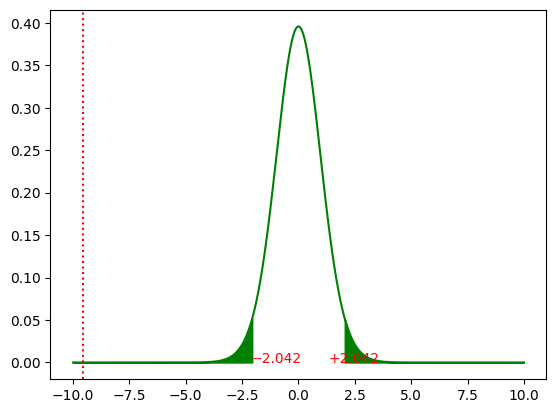

In [19]:
x = np.linspace(-10,10,1000)
y = [stats.t.pdf(v, df=n-2) for v in x]

t_critical_left = t_crit_left
t_critical_right = t_crit_right

plt.plot(x,y, color='g')
plt.fill_between(x[x>=t_critical_right],
                 stats.t.pdf(x[x>=t_critical_right], df=n-2),
                 color='g'
                 )
plt.fill_between(x[x<=t_critical_left],
                 stats.t.pdf(x[x<=t_critical_left], df=n-2),
                 color='g'
                 )
plt.text(t_critical_left, 0, f"-{t_critical_left:.3f}", color='r')
plt.text(t_critical_right-0.7, 0, f"+{t_critical_right:.3f}", color='r')
plt.axvline(t_cal, ls=':', color='r')